In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("voice.csv")
df.shape

(3168, 21)

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
new_df=df["label"].value_counts().rename_axis("gender").reset_index(name="counts")
new_df.head()

,gender,counts
0,male,1584
1,female,1584


In [5]:
label=new_df.gender
values=new_df.counts

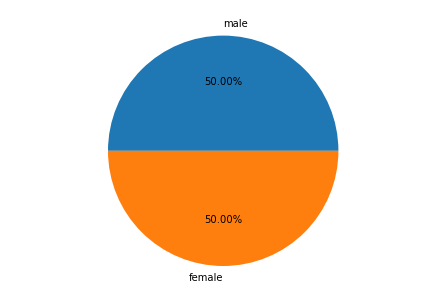

In [6]:
fig=plt.figure()
a=fig.add_axes([0,0,1,1])
a.axis("equal")
a.pie(values,labels=label,autopct="%1.2f%%")
plt.show()

In [7]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
s=df.iloc[:,:-1]
t=df.iloc[:,-1]
print(type(s))
print(type(t))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [10]:
print(s.shape)
print(t.shape)

(3168, 20)
(3168,)


In [11]:
s.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [12]:
t.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
s_train,s_test,t_train,t_test=train_test_split(s,t,test_size=0.20)
print(s_train.shape)
print(s_test.shape)
print(t_train.shape)
print(t_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
m1=DecisionTreeClassifier(criterion="gini",max_depth=15,min_samples_split=15)
m1.fit(s_train,t_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=15)

In [20]:
print("Training score",m1.score(s_train,t_train))
print("Testing score",m1.score(s_test,t_test))

Training score 0.989344909234412
Testing score 0.9574132492113565


In [26]:
ypred_m1=m1.predict(s_test)
print(ypred_m1)

['female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'female' 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'female'
 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 '

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
cm_m1=confusion_matrix(t_test,ypred_m1)
print(cm_m1)

[[289  10]
 [ 17 318]]


In [25]:
print(classification_report(t_test,ypred_m1))

              precision    recall  f1-score   support

      female       0.94      0.97      0.96       299
        male       0.97      0.95      0.96       335

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
m2=RandomForestClassifier(n_estimators=45,criterion="entropy",max_depth=15,min_samples_split=15)
m2.fit(s_train,t_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=15,
                       n_estimators=45)

In [29]:
print("Training score",m2.score(s_train,t_train))
print("Testing score",m2.score(s_test,t_test))

Training score 0.9932912391475928
Testing score 0.9747634069400631


In [54]:
ypred_m2=m2.predict(s_test)
print(ypred_m2)

['female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'female'
 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'female'
 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female'
 'female' 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'female' 'female' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'female'
 'ma

In [31]:
cm_m2=confusion_matrix(t_test,ypred_m2)
print(cm_m2)

[[294   5]
 [ 11 324]]


In [32]:
print(classification_report(t_test,ypred_m2))

              precision    recall  f1-score   support

      female       0.96      0.98      0.97       299
        male       0.98      0.97      0.98       335

    accuracy                           0.97       634
   macro avg       0.97      0.98      0.97       634
weighted avg       0.97      0.97      0.97       634



In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
m3=KNeighborsClassifier(n_neighbors=53)
m3.fit(s_train,t_train)

KNeighborsClassifier(n_neighbors=53)

In [35]:
print("Training score",m3.score(s_train,t_train))
print("Testing score",m3.score(s_test,t_test))

Training score 0.7044198895027625
Testing score 0.7034700315457413


In [36]:
ypred_m3=m3.predict(s_test)
print(ypred_m3)

['male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'male' 'male'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'female'
 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'


In [37]:
cm_m3=confusion_matrix(t_test,ypred_m3)
print(cm_m3)

[[201  98]
 [ 90 245]]


In [38]:
print(classification_report(t_test,ypred_m3))

              precision    recall  f1-score   support

      female       0.69      0.67      0.68       299
        male       0.71      0.73      0.72       335

    accuracy                           0.70       634
   macro avg       0.70      0.70      0.70       634
weighted avg       0.70      0.70      0.70       634



In [39]:
from sklearn.linear_model import LogisticRegression


In [40]:
m5=LogisticRegression(solver="liblinear")
m5.fit(s_train,t_train)

LogisticRegression(solver='liblinear')

In [41]:
print("Training score",m5.score(s_train,t_train))
print("Testing score",m5.score(s_test,t_test))

Training score 0.9139700078926598
Testing score 0.8974763406940063


In [42]:
ypred_m5=m5.predict(s_test)
print(ypred_m5)

['female' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'female'
 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female'
 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 '

In [43]:
cm_m5=confusion_matrix(t_test,ypred_m5)
print(cm_m5)

[[248  51]
 [ 14 321]]


In [44]:
print(classification_report(t_test,ypred_m5))

              precision    recall  f1-score   support

      female       0.95      0.83      0.88       299
        male       0.86      0.96      0.91       335

    accuracy                           0.90       634
   macro avg       0.90      0.89      0.90       634
weighted avg       0.90      0.90      0.90       634



In [45]:
from sklearn.svm import SVC

In [48]:
m4=SVC(kernel="linear",C=0.1)
m4.fit(s_train,t_train)

SVC(C=0.1, kernel='linear')

In [49]:
print("Training score",m4.score(s_train,t_train))
print("Testing score",m4.score(s_test,t_test))

Training score 0.8259668508287292
Testing score 0.832807570977918


In [50]:
ypred_m4=m4.predict(s_test)
print(ypred_m4)

['male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male'
 'male' '

In [51]:
cm_m4=confusion_matrix(t_test,ypred_m4)
print(cm_m4)

[[220  79]
 [ 27 308]]


In [52]:
print(classification_report(t_test,ypred_m4))

              precision    recall  f1-score   support

      female       0.89      0.74      0.81       299
        male       0.80      0.92      0.85       335

    accuracy                           0.83       634
   macro avg       0.84      0.83      0.83       634
weighted avg       0.84      0.83      0.83       634

